# EDA - class distributuin and image check
출처: https://dacon.io/competitions/official/235894/codeshare/4827?page=1&dtype=recent

출처: https://dacon.io/competitions/official/235894/codeshare/4748?page=1&dtype=recent

**대회 목적**
- 15종류의 사물 종류, 상태에 따라 이미지가 분류
- 사물의 종류를 분류하고, 정상 샘플과 비정상 샘플 분류

**평가 지표**
- Macro-F1 score

## Module import

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm

import matplotlib.pyplot as plt

# 데이터 불러오기

In [2]:
data_dir = "/content/drive/MyDrive/Colab Notebooks/data/"

In [4]:
train_df = pd.read_csv(data_dir + "train_df.csv")
test_df = pd.read_csv(data_dir + "test_df.csv")

**데이터 살펴보기**

In [5]:
display(train_df.shape, train_df.head())
display(test_df.shape,test_df.head())

(4277, 5)

,index,file_name,class,state,label
0,0,10000.png,transistor,good,transistor-good
1,1,10001.png,capsule,good,capsule-good
2,2,10002.png,transistor,good,transistor-good
3,3,10003.png,wood,good,wood-good
4,4,10004.png,bottle,good,bottle-good


(2154, 2)

,index,file_name
0,0,20000.png
1,1,20001.png
2,2,20002.png
3,3,20003.png
4,4,20004.png


In [6]:
print(f"class의 수: {len(train_df['class'].unique())}")
print(f"state의 수: {len(train_df['state'].unique())}")
print(f"label의 수: {len(train_df['label'].unique())}")

class의 수: 15
state의 수: 49
label의 수: 88


## class, state, label 분포

**class 분포**

In [7]:
colors = ['tomato', 'wheat','orange', 'teal', 'gold', 
  'thistle', 'lime', 'magenta', 'cyan', 
 'tan', 'bisque',  'violet', 'coral', 'Olive', 'chocolate']

In [10]:
data = train_df.groupby(['class']).size().sort_values(ascending=False).reset_index(name='cnt')

data

,class,cnt
0,hazelnut,427
1,screw,381
2,pill,340
3,carpet,327
4,zipper,301
5,grid,294
6,leather,293
7,wood,278
8,capsule,275
9,tile,273


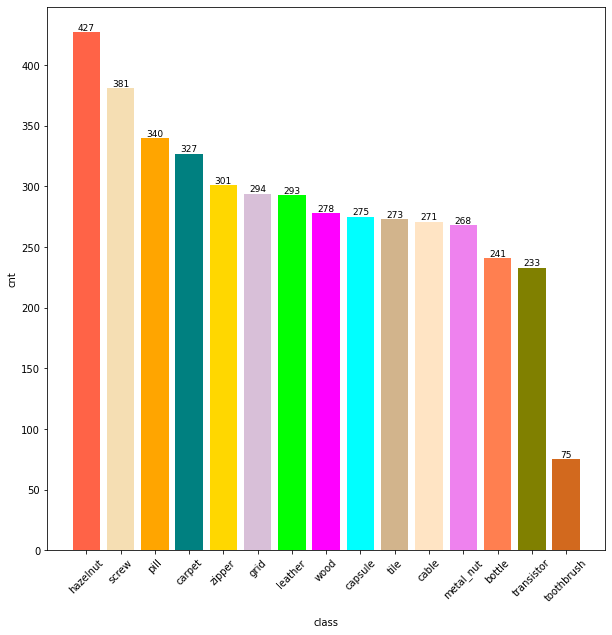

In [24]:
plt.figure(figsize=(10, 10))
plt.bar(data['class'], data['cnt'], color=colors)
plt.xlabel('class', labelpad=15)
plt.xticks(rotation=45)
plt.ylabel('cnt')

for i, v in enumerate(data['class']):
  # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
  plt.text(v, data['cnt'][i], data['cnt'][i], fontsize=9, horizontalalignment='center', verticalalignment='bottom')

plt.show()

**class 별 state의 분포**

In [27]:
labelCount = train_df[['class', 'label']].groupby('label').count().rename(columns={'class': 'count'})
labelCount

,count
label,
bottle-broken_large,10
bottle-broken_small,11
bottle-contamination,11
bottle-good,209
cable-bent_wire,7
...,...
zipper-fabric_interior,8
zipper-good,240
zipper-rough,9


In [ ]:
anomaly_dict = {}

for classname in train_df['class'].unique():
  df = pd.DataFrame(labelCount[labelCount.index.str.contains(classname)]).sort_values(by='count', ascending=False)
  anomaly_dict[classname] = df

anomaly_dict

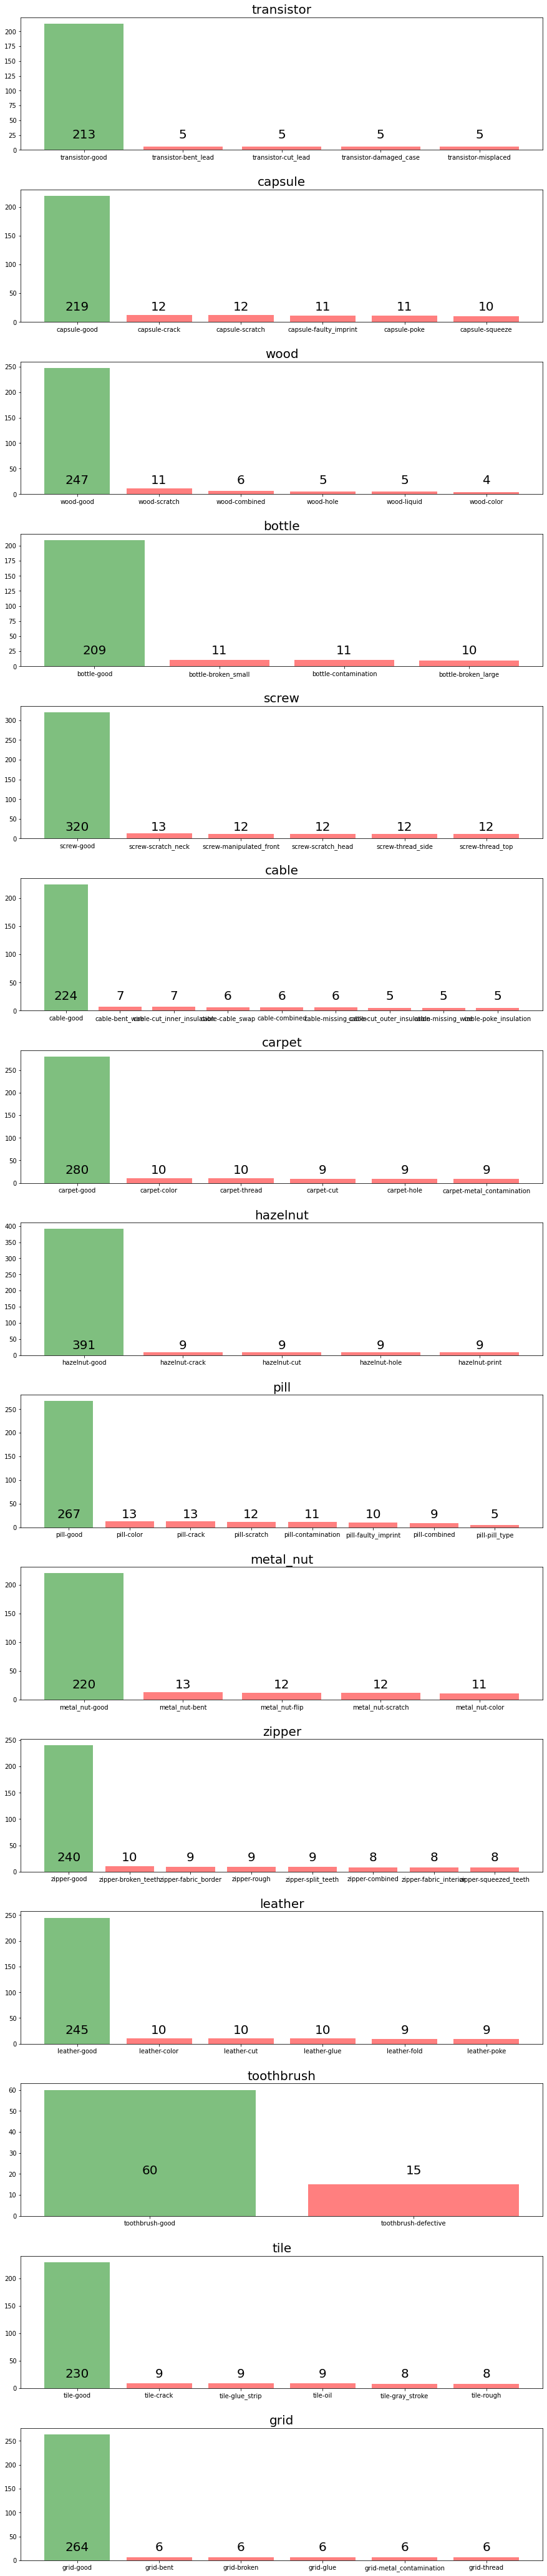

In [30]:
fig, axs = plt.subplots(15, 1, figsize=(15, 15*5))
fig.subplots_adjust(hspace = .3)
axs = axs.ravel()

for i, (className, df) in enumerate(anomaly_dict.items()):
    colors = ['red' for i in range(len(df.index))]
    colors[0] = 'green'
    axs[i].bar(df.index, df.iloc[:, 0], color=colors, alpha=0.5)
    axs[i].set_title(className, fontsize=20)
    for j, value in enumerate(df.iloc[:, 0]):
        axs[i].text(j, 20, df.iloc[:, 0][j], ha='center', fontsize=20)

## 이미지

In [39]:
folder_dir = data_dir + 'train/'

**class image**

In [35]:
train_df.loc[train_df['class']=='pill']['file_name'].sample(1)

2690    12690.png
Name: file_name, dtype: object

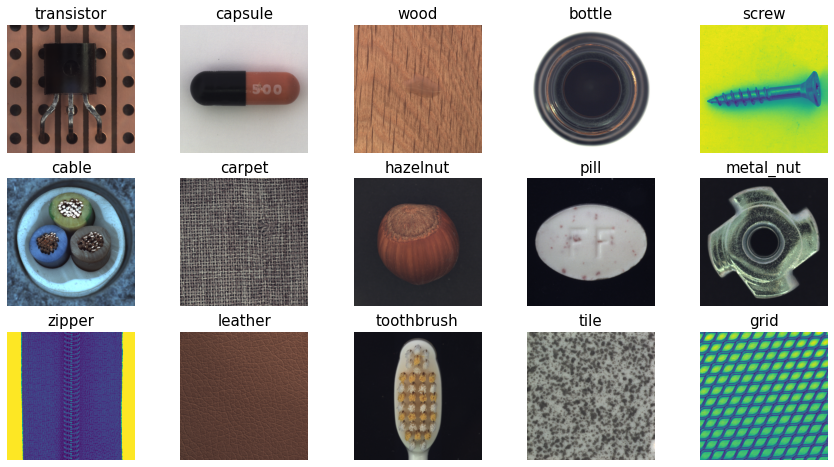

In [38]:
fig, axs = plt.subplots(3, 5, figsize=(15, 8))

for i, current_class in enumerate(train_df['class'].unique()):
  image = plt.imread(folder_dir + train_df.loc[train_df['class']==current_class]['file_name'].sample(1).iloc[0])
  axs[i // 5, i % 5].imshow(image)
  axs[i // 5, i % 5].set_title(current_class, fontsize=15)
  axs[i // 5, i % 5].axis('off')

**class with state image**

In [41]:
for current_class in train_df['class'].unique():
  tmp = train_df.loc[train_df['class'] == current_class]
  states = train_df.loc[train_df['class'] == current_class, 'state'].unique()

  fig, axs = plt.subplots(1, len(states), figsize=(20, 8))
 
  for col_idx, state in enumerate(states):
    img_dir = tmp.loc[tmp['state'] == state, 'file_name'].sample(1).iloc[0]
    image = plt.imread(folder_dir + img_dir)
    axs[col_idx].imshow(image)
    axs[col_idx].set_xticklabels([])
    axs[col_idx].set_yticklabels([])

  for ax, col in zip(axs, states):
    ax.set_title(col, size = 15)

  axs[0].set_ylabel(current_class, rotation=0, fontsize=15, labelpad=40, fontdict=dict(weight='bold'))

  fig.tight_layout()
  # plt.suptitle(mask_state,fontsize=25, y=1.04)
  plt.show()
  print('\n\n')

Output hidden; open in https://colab.research.google.com to view.

**image size**

In [42]:
# 넓이, 높이, 채널
train_df['width'] = np.nan
train_df['height'] = np.nan
train_df['channel'] = np.nan

test_df['width'] = np.nan
test_df['height'] = np.nan
test_df['channel'] = np.nan

In [ ]:
for i in tqdm(range(len(train_df))):
    image = plt.imread(data_dir + 'train/' + train_df['file_name'].loc[i])
    if len(image.shape) == 2:
      w, h = image.shape
      c = 1
    else:
      w, h, c = image.shape
    train_df.loc[i, 'width'] = w
    train_df.loc[i, 'height'] = h
    train_df.loc[i, 'channel'] = c

for i in tqdm(range(len(test_df))):
    image = plt.imread(data_dir + 'test/' + test_df['file_name'].loc[i])
    if len(image.shape) == 2:
      w, h = image.shape
      c = 1
    else:
      w, h, c = image.shape
    test_df.loc[i, 'width'] = w
    test_df.loc[i, 'height'] = h
    test_df.loc[i, 'channel'] = c

100%|██████████| 2154/2154 [21:58<00:00,  1.63it/s]


In [ ]:
(train_df['width']/train_df['height']).unique(), (test_df['width']/test_df['height']).unique()

(array([1.]), array([1.]))

train data, test data의 모든 이미지는 높이, 넓이 비율이 1 : 1

**class image width**

In [ ]:
tmp = train_df.groupby('class')['width'].unique().reset_index(name = 'width')
display(tmp)

print('\n')
tmp ['width'] = tmp['width'].apply(lambda x: x[0])
for v in train_df['width'].unique():
  print(f'image size {int(v):,} x {int(v):,}:', tmp.loc[tmp['width'] == v, 'class'].to_list())

,class,width
0,bottle,[900.0]
1,cable,[1024.0]
2,capsule,[1000.0]
3,carpet,[1024.0]
4,grid,[1024.0]
5,hazelnut,[1024.0]
6,leather,[1024.0]
7,metal_nut,[700.0]
8,pill,[800.0]
9,screw,[1024.0]




image size 1,024 x 1,024: ['cable', 'carpet', 'grid', 'hazelnut', 'leather', 'screw', 'toothbrush', 'transistor', 'wood', 'zipper']
image size 1,000 x 1,000: ['capsule']
image size 900 x 900: ['bottle']
image size 800 x 800: ['pill']
image size 700 x 700: ['metal_nut']
image size 840 x 840: ['tile']


image size 1,024 x 1,024: ['cable', 'carpet', 'grid', 'hazelnut', 'leather', 'screw', 'toothbrush', 'transistor', 'wood', 'zipper']

image size 1,000 x 1,000: ['capsule']

image size 900 x 900: ['bottle']

image size 800 x 800: ['pill']

image size 700 x 700: ['metal_nut']

image size 840 x 840: ['tile']

**class image channel**

In [ ]:
tmp = train_df.groupby('class')['channel'].unique().reset_index(name = 'channel')
display(tmp)

print('\n')
tmp ['channel'] = tmp['channel'].apply(lambda x: x[0])
for v in train_df['channel'].unique():
  print(f'image channel {int(v):,}:', tmp.loc[tmp['channel'] == v, 'class'].to_list())

,class,channel
0,bottle,[3.0]
1,cable,[3.0]
2,capsule,[3.0]
3,carpet,[3.0]
4,grid,[1.0]
5,hazelnut,[3.0]
6,leather,[3.0]
7,metal_nut,[3.0]
8,pill,[3.0]
9,screw,[1.0]




image channel 3: ['bottle', 'cable', 'capsule', 'carpet', 'hazelnut', 'leather', 'metal_nut', 'pill', 'tile', 'toothbrush', 'transistor', 'wood']
image channel 1: ['grid', 'screw', 'zipper']


image channel 3: ['bottle', 'cable', 'capsule', 'carpet', 'hazelnut', 'leather', 'metal_nut', 'pill', 'tile', 'toothbrush', 'transistor', 'wood']

image channel 1: ['grid', 'screw', 'zipper']

## summary
- label의 수는 많지만 비정상인 label의 이미지 수가 매우 적다
- 각 class별 state수가 많게는 7개 적게는 1개이고, state를 공유하는 class가 존재
- augmentation을 state를 고려해서 잘 적용할 필요가 있음
- 모든 이미지는 w, h가 동일하고, class별 고유의 이미지 크기를 갖는 class가 존재
- 흑백인 이미지가 존재